In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from utils.utils import *
from utils.matric import *

In [7]:
GT_dir_origin = "./image/GT/Origin/"
Restore_dir_origin = "./image/Restore/Origin/"

def read_hdr(path):
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    return img

def write_png(path, img):
    img *= 255
    cv2.imwrite(path, img)

def get_hdr_list(dir):
    hdr_images = []
    files = get_all_files(dir, suffix=".hdr")
    for file in files:
        path = os.path.join(dir, file)
        img = read_hdr(path)
        hdr_images.append(img)
    return hdr_images
        
hdr_list_gt = get_hdr_list(GT_dir_origin)
hdr_list_restore = get_hdr_list(Restore_dir_origin)

hdr_list_gt_copy = hdr_list_gt.copy()
hdr_list_restore_copy = hdr_list_restore.copy()

In [24]:
GT_dir_tonemapped = "./image/GT/Tonemapped/"
Restore_dir_tonemapped  = "./image/Restore/Tonemapped/"


def hdr_tonemapped(input_dir, output_dir, mode=1):
    files = get_all_files(input_dir, suffix=".hdr")
    assert 1 <= mode <= 3, "mode is illegal!"
    factor = 3
    if mode == 1:
        tonemap_algorithm = cv2.createTonemapDrago()
    elif mode == 2:
        tonemap_algorithm = cv2.createTonemapReinhard()
        factor = 1
    else:
        tonemap_algorithm = cv2.createTonemapMantiuk()
    for file in files:
        read_path = os.path.join(input_dir, file)
        name = file[:-4]
        image = read_hdr(read_path)
        image_processed = tonemap_algorithm.process(image)
        image_processed *= factor
        write_path = os.path.join(output_dir, file)
        write_png(write_path[:-3]+"png", image_processed)


plt.rcParams.update({'font.size': 18})

def draw_images(title):
    f, axs = plt.subplots(2, 4, figsize=(20, 8))
    f.suptitle(title)
    for i in range(4):
        gt_img = cv2.imread(f"./image/GT/Tonemapped/0{i+1}.png")
        re_img = cv2.imread(f"./image/Restore/Tonemapped/0{i+1}.png")
        axs[0, i].imshow(cv2.cvtColor(gt_img, cv2.COLOR_BGR2RGB))
        axs[1, i].imshow(cv2.cvtColor(re_img, cv2.COLOR_BGR2RGB))
        axs[0, i].axis('off')
        axs[1, i].axis('off')
        title = "_".join(title.split())
    plt.savefig(f'./results/{title}.pdf')
    plt.show()

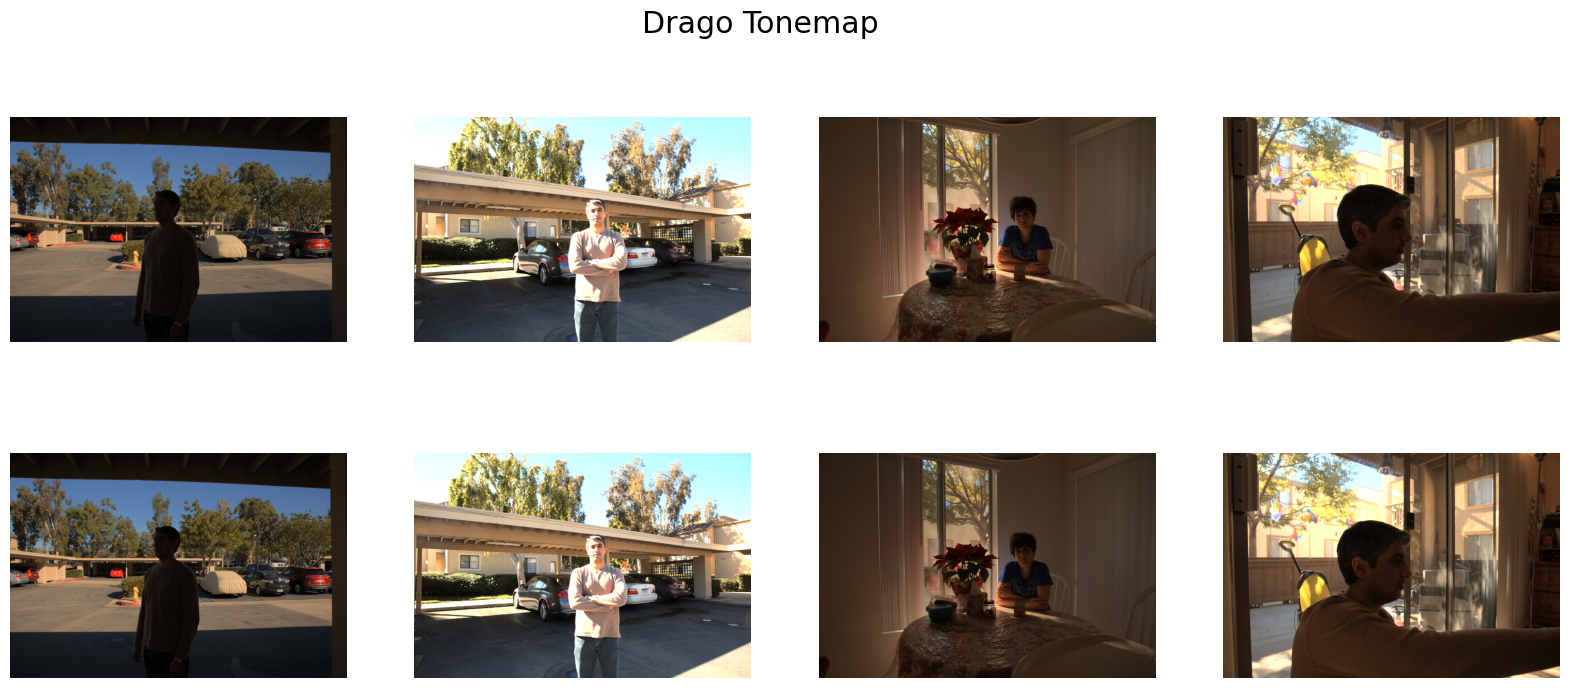

In [25]:
hdr_tonemapped(GT_dir_origin, GT_dir_tonemapped)
hdr_tonemapped(Restore_dir_origin, Restore_dir_tonemapped)
    
draw_images("Drago Tonemap")

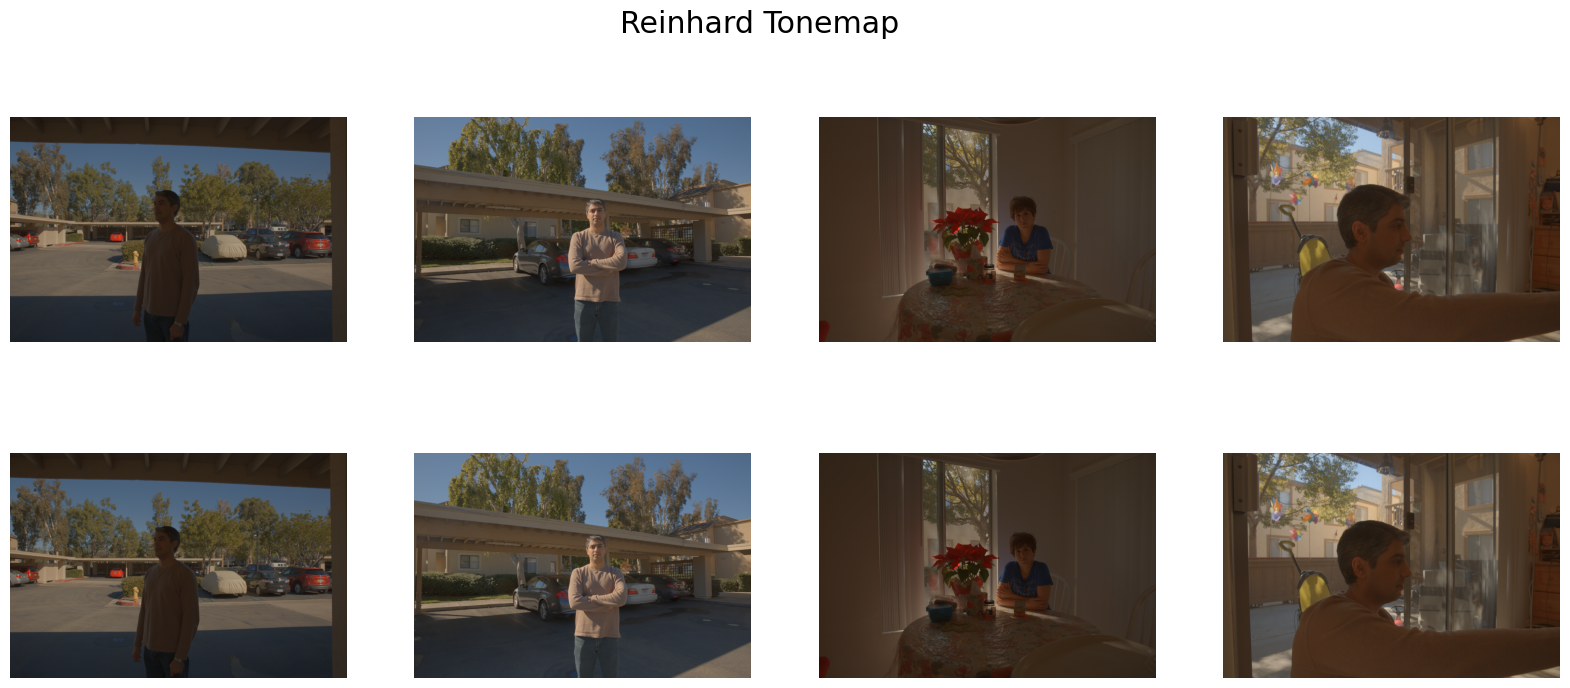

In [26]:
hdr_tonemapped(GT_dir_origin, GT_dir_tonemapped, mode=2)
hdr_tonemapped(Restore_dir_origin, Restore_dir_tonemapped, mode=2)
    
draw_images("Reinhard Tonemap")

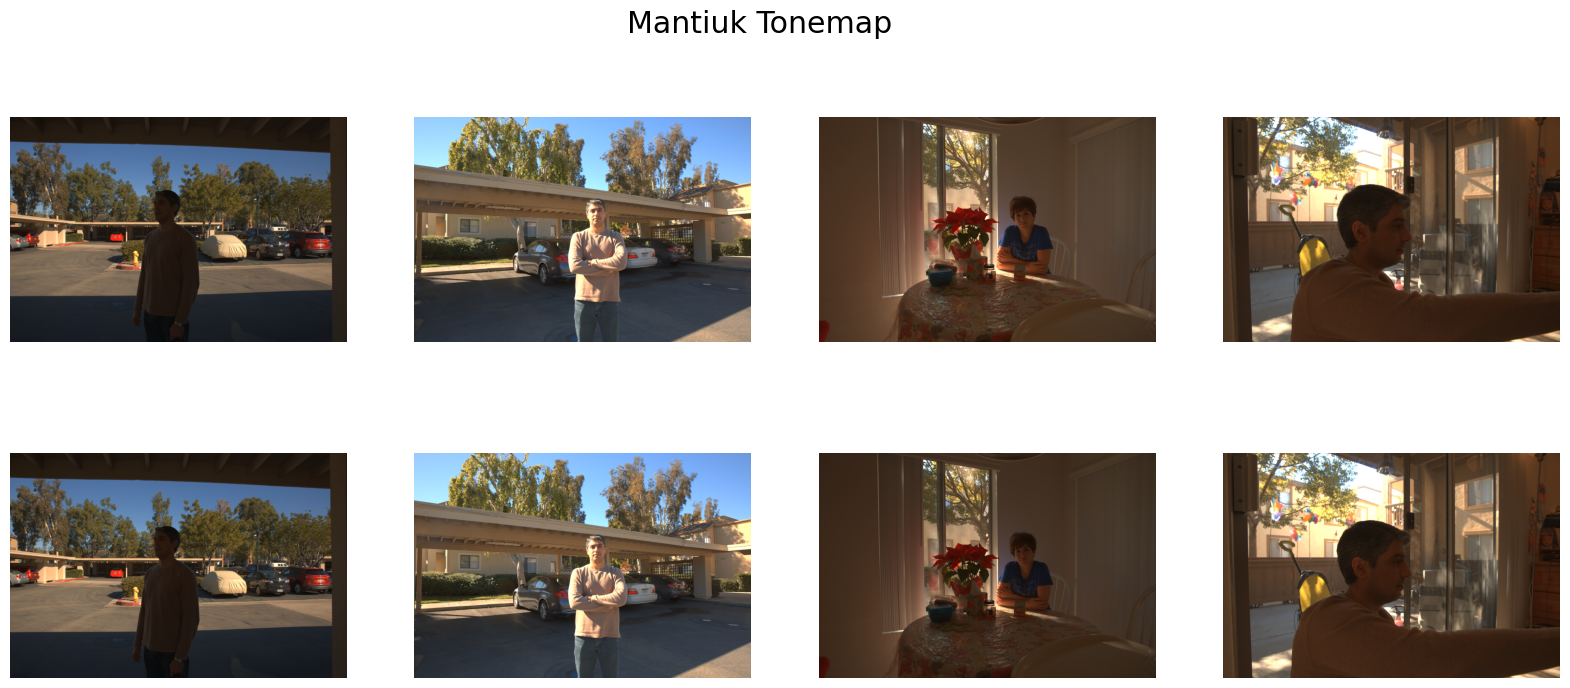

In [27]:
hdr_tonemapped(GT_dir_origin, GT_dir_tonemapped, mode=3)
hdr_tonemapped(Restore_dir_origin, Restore_dir_tonemapped, mode=3)
    
draw_images("Mantiuk Tonemap")